# Introduction 
#### In this part, we will break down the parts of a ConvNet and see what image look like after each stage

## Import function and image

Using TensorFlow backend.


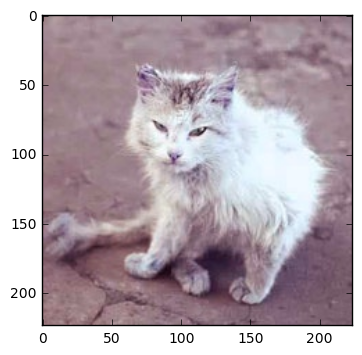

In [3]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential


import numpy as np
import matplotlib.pyplot as plt
import cv2


cat = cv2.imread('cat.jpg')
plt.imshow(cat)
plt.show()

## Create simple model

In [9]:
model = Sequential()
model.add(Convolution2D(3,10,10,input_shape=cat.shape))
cat_batch = np.expand_dims(cat,axis=0)

conv_cat = model.predict(cat_batch)

/Users/macbook/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (10, 10), input_shape=(224, 224,...)`
  from ipykernel import kernelapp as app


## Visualize image

In [10]:
def visualize_cat(model, cat):
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat = model.predict(cat_batch)
    conv_cat = np.squeeze(conv_cat, axis=0)
    print conv_cat.shape
    plt.imshow(conv_cat)
    plt.show()

(215, 215, 3)


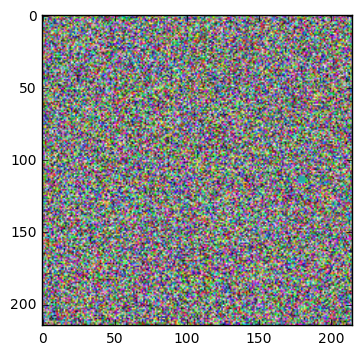

In [11]:
visualize_cat(model, cat)

## Change a little bit to see color chanels better

In [12]:
def nice_cat_printer(model, cat):
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat2 = model.predict(cat_batch)

    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    print conv_cat2.shape
    conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])

    print conv_cat2.shape
    plt.imshow(conv_cat2)
    plt.show()

/Users/macbook/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(224, 224,...)`


(222, 222, 1)
(222, 222)


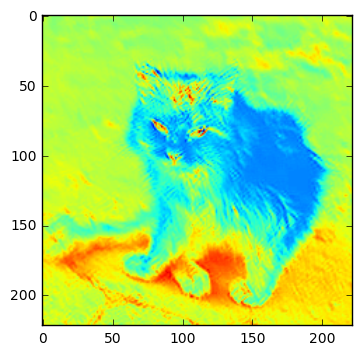

In [16]:
model = Sequential()
model.add(Convolution2D(1,  3,  3,  input_shape=cat.shape))

# Keras expects batches of images, so we have to add a dimension to trick it into being nice
nice_cat_printer(model, cat)


## Change the size of kernel 
If we increase the kernel size its far more obvious now that we get less detail, but the image is also smaller than the other two

/Users/macbook/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (15, 15), input_shape=(224, 224,...)`


(210, 210, 1)
(210, 210)


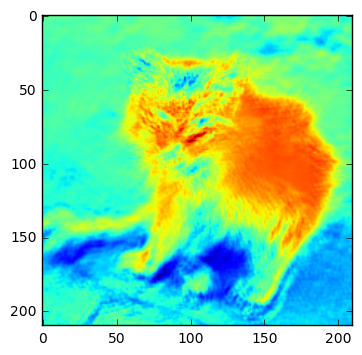

In [17]:
#15x15

model = Sequential()
model.add(Convolution2D(1,  15,  15,  input_shape=cat.shape))

nice_cat_printer(model, cat)


## Add activation

/Users/macbook/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(224, 224,...)`
  from ipykernel import kernelapp as app


(222, 222, 1)
(222, 222)


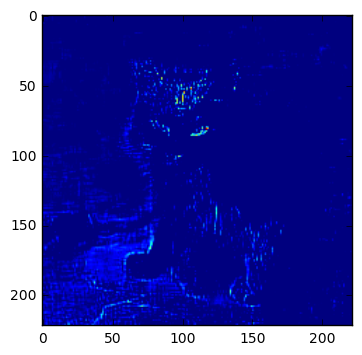

In [18]:
model = Sequential()
model.add(Convolution2D(1,  3,  3,  input_shape=cat.shape))
model.add(Activation('relu'))

nice_cat_printer(model, cat)


## Add Pooling

/Users/macbook/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(224, 224,...)`
  from ipykernel import kernelapp as app


(111, 111, 1)
(111, 111)


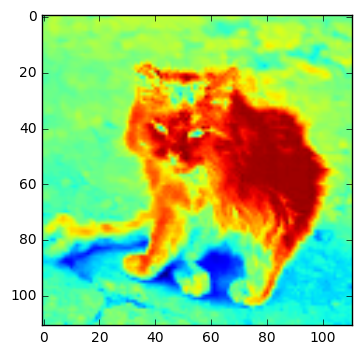

In [21]:
model = Sequential()
model.add(Convolution2D(1,  3,  3,  input_shape=cat.shape))
model.add(MaxPooling2D(pool_size=(2,2)))

nice_cat_printer(model, cat)



## Pooling after activation

/Users/macbook/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(224, 224,...)`
  from ipykernel import kernelapp as app


(111, 111, 1)
(111, 111)


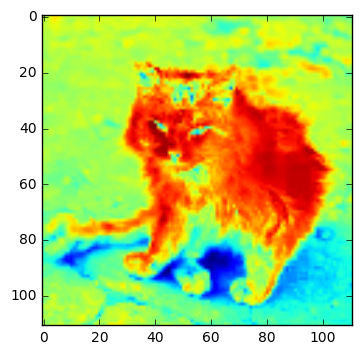

In [22]:
model = Sequential()
model.add(Convolution2D(1,  3,  3,  input_shape=cat.shape))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

nice_cat_printer(model, cat)

